# Prediksi Harga X-Ripple 

# Import library

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Linear Regression Model").getOrCreate()

In [2]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import IndexToString, StringIndexer

# Load and verify data

In [3]:
data = spark.read.csv('Xrp.csv',header = True, inferSchema = True)

In [4]:
data.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Value: string (nullable = true)



In [5]:
data.head(10)

[Row(Date=datetime.date(2015, 1, 22), Open=0.01523, High=0.0175, Low=0.01523, Close=0.01602, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 23), Open=0.01602, High=0.017, Low=0.016, Close=0.016, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 24), Open=0.016, High=0.01739, Low=0.015, Close=0.01739, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 25), Open=0.01739, High=0.01739, Low=0.0156, Close=0.017, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 26), Open=0.017, High=0.0175, Low=0.01469, Close=0.01469, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 27), Open=0.01469, High=0.017, Low=0.01469, Close=0.0155, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 28), Open=0.0155, High=0.0167, Low=0.0131, Close=0.015, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 29), Open=0.015, High=0.015, Low=0.0131, Close=0.0135, Volume=0, Value='USD'),
 Row(Date=datetime.date(2015, 1, 30), Open=0.0135, High=0.015, Low=0.0135, Close=0.015,

In [6]:
for item in data.head(1)[0]:
    print(item)

2015-01-22
0.01523
0.0175
0.01523
0.01602
0
USD


In [7]:
data.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Value']

In [8]:
data.groupBy('Close').count().show()

+-------+-----+
|  Close|count|
+-------+-----+
|0.00687|    1|
|0.03275|    1|
| 0.2556|    1|
|0.55823|    1|
|0.52987|    1|
|0.43727|    1|
|0.31097|    1|
|0.30969|    1|
|0.27422|    1|
|0.22902|    1|
|  0.204|    1|
|0.23736|    1|
|0.25113|    1|
| 0.9705|    1|
|1.12334|    1|
|0.69602|    1|
| 0.7919|    1|
|0.61438|    1|
|0.38637|    1|
|0.00591|    3|
+-------+-----+
only showing top 20 rows



# Data Preprocessing

In [9]:
indexer_volume = StringIndexer(inputCol='Volume', outputCol='VolumeIndex')
indexer_value = StringIndexer(inputCol='Value', outputCol='ValueIndex')

In [10]:
# Fitting dan transforming DataFrame
indexed = indexer_volume.fit(data).transform(data)
indexed = indexer_value.fit(indexed).transform(indexed)

In [11]:
indexed.show()

+----------+-------+-------+-------+-------+------+-----+-----------+----------+
|      Date|   Open|   High|    Low|  Close|Volume|Value|VolumeIndex|ValueIndex|
+----------+-------+-------+-------+-------+------+-----+-----------+----------+
|2015-01-22|0.01523| 0.0175|0.01523|0.01602|     0|  USD|        0.0|       0.0|
|2015-01-23|0.01602|  0.017|  0.016|  0.016|     0|  USD|        0.0|       0.0|
|2015-01-24|  0.016|0.01739|  0.015|0.01739|     0|  USD|        0.0|       0.0|
|2015-01-25|0.01739|0.01739| 0.0156|  0.017|     0|  USD|        0.0|       0.0|
|2015-01-26|  0.017| 0.0175|0.01469|0.01469|     0|  USD|        0.0|       0.0|
|2015-01-27|0.01469|  0.017|0.01469| 0.0155|     0|  USD|        0.0|       0.0|
|2015-01-28| 0.0155| 0.0167| 0.0131|  0.015|     0|  USD|        0.0|       0.0|
|2015-01-29|  0.015|  0.015| 0.0131| 0.0135|     0|  USD|        0.0|       0.0|
|2015-01-30| 0.0135|  0.015| 0.0135|  0.015|  1016|  USD|       43.0|       0.0|
|2015-01-31|  0.015|  0.015|

In [12]:
indexed.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Value: string (nullable = true)
 |-- VolumeIndex: double (nullable = false)
 |-- ValueIndex: double (nullable = false)



In [13]:
assembler = VectorAssembler(inputCols =['Open', 'High', 'Low', 'Close'],
                            outputCol='features')

In [14]:
output = assembler.transform(data)

In [15]:
output.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Value: string (nullable = true)
 |-- features: vector (nullable = true)



In [16]:
print(output.features)

Column<'features'>


In [17]:
output.head(1)

[Row(Date=datetime.date(2015, 1, 22), Open=0.01523, High=0.0175, Low=0.01523, Close=0.01602, Volume=0, Value='USD', features=DenseVector([0.0152, 0.0175, 0.0152, 0.016]))]

In [18]:
final_data = output.select('features','Close')

In [19]:
final_data.show()

+--------------------+-------+
|            features|  Close|
+--------------------+-------+
|[0.01523,0.0175,0...|0.01602|
|[0.01602,0.017,0....|  0.016|
|[0.016,0.01739,0....|0.01739|
|[0.01739,0.01739,...|  0.017|
|[0.017,0.0175,0.0...|0.01469|
|[0.01469,0.017,0....| 0.0155|
|[0.0155,0.0167,0....|  0.015|
|[0.015,0.015,0.01...| 0.0135|
|[0.0135,0.015,0.0...|  0.015|
|[0.015,0.015,0.01...|0.01499|
|[0.01499,0.01499,...|0.01352|
|[0.015,0.015,0.01...|0.01327|
|[0.01327,0.015,0....| 0.0148|
|[0.0148,0.0148,0....|  0.014|
|[0.014,0.01573,0....|0.01573|
|[0.01573,0.01695,...| 0.0155|
|[0.0155,0.0155,0....|0.01468|
|[0.01468,0.01506,...|0.01428|
|[0.01428,0.01467,...| 0.0135|
|[0.0135,0.01467,0...|0.01464|
+--------------------+-------+
only showing top 20 rows



# Train Test split

In [20]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [21]:
train_data.describe().show()

+-------+-------------------+
|summary|              Close|
+-------+-------------------+
|  count|               2000|
|   mean|0.34871117500000026|
| stddev| 0.3700656904899566|
|    min|            0.00356|
|    max|               2.78|
+-------+-------------------+



In [22]:
test_data.describe().show()

+-------+-------------------+
|summary|              Close|
+-------+-------------------+
|  count|                771|
|   mean|0.35811370946822296|
| stddev|0.38003778090276075|
|    min|              0.004|
|    max|               2.73|
+-------+-------------------+



# Build Model

In [23]:
regressor = LinearRegression(labelCol='Close')

In [24]:
model = regressor.fit(train_data)

# Evaluate Model

In [25]:
pred_data = model.evaluate(test_data)

In [26]:
pred_data.residuals.show()

+--------------------+
|           residuals|
+--------------------+
|-3.72965547335013...|
|-3.72965547335013...|
|2.975050761300224...|
|-6.24500451351650...|
|-4.77048955893621...|
|-3.81639164714897...|
|-3.64291929955129...|
|-3.64291929955129...|
|3.035766082959412...|
|4.336808689942018...|
|-5.20417042793042...|
|-3.03576608295941...|
|2.168404344971009...|
|-5.20417042793042...|
|-3.03576608295941...|
|-4.77048955893621...|
|-3.29597460435593...|
|-3.98986399474665...|
|-2.42861286636753...|
|-3.20923843055709...|
+--------------------+
only showing top 20 rows



In [27]:
pred_data.rootMeanSquaredError

2.7656153966199967e-15

In [28]:
pred_data.r2

1.0

In [29]:
pred_data.meanSquaredError

7.648628522021581e-30

In [30]:
pred_data.meanAbsoluteError

1.0455511384620705e-15

In [31]:
from pyspark.sql import functions as f
data.select(f.corr('Close', 'Low')).show()

+------------------+
|  corr(Close, Low)|
+------------------+
|0.9953825126484201|
+------------------+



In [32]:
unlabeled_data = test_data.select('features')
test_predictions = model.transform(unlabeled_data)

In [33]:
test_predictions.show()

+--------------------+--------------------+
|            features|          prediction|
+--------------------+--------------------+
|[0.004,0.004,0.00...|0.004000000000000037|
|[0.004,0.004,0.00...|0.004000000000000037|
|[0.004,0.0114,0.0...|0.003999999999999703|
|[0.00402,0.00415,...|0.004150000000000...|
|[0.00417,0.00432,...|0.004310000000000047|
|[0.0043,0.00433,0...|0.004330000000000038|
|[0.00435,0.00435,...|0.004350000000000036|
|[0.0044,0.0044,0....|0.004400000000000037|
|[0.00445,0.0055,0...| 0.00399999999999997|
|[0.0046,0.0071,0....|0.005009999999999956|
|[0.00485,0.0062,0...|0.005610000000000...|
|[0.00492,0.00543,...| 0.00511000000000003|
|[0.005,0.0055,0.0...|0.003999999999999978|
|[0.005,0.0056,0.0...|0.005000000000000005|
|[0.00505,0.00525,...|0.005100000000000031|
|[0.00508,0.00508,...|0.004800000000000047|
|[0.0051,0.0051,0....|0.005010000000000033|
|[0.00513,0.0054,0...| 0.00520000000000004|
|[0.0052,0.00535,0...|0.005100000000000025|
|[0.00523,0.00523,...|0.00512000

# Visualisasi Saham

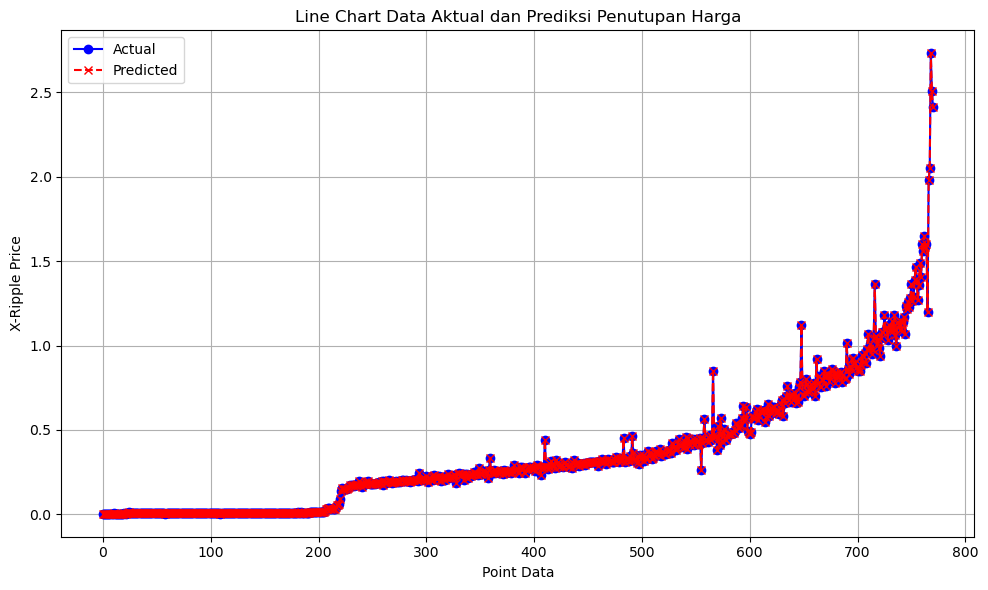

In [34]:
import matplotlib.pyplot as plt
# Mendapatkan prediksi dari test data
predictions = test_predictions.select('prediction').collect()
actual_values = test_data.select('Close').collect()

# Mengonversi hasil prediksi dan nilai aktual ke dalam list
predicted_values = [row['prediction'] for row in predictions]
actual_values_list = [row['Close'] for row in actual_values]

# Membuat line chart
plt.figure(figsize=(10, 6))

# Plot nilai aktual
plt.plot(actual_values_list, label='Actual', marker='o', linestyle='-', color='blue')

# Plot hasil prediksi
plt.plot(predicted_values, label='Predicted', marker='x', linestyle='--', color='red')

# Menambahkan label sumbu x dan y, judul, dan legend
plt.xlabel('Point Data')
plt.ylabel('X-Ripple Price')
plt.title('Line Chart Data Aktual dan Prediksi Penutupan Harga')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Menampilkan line chart
plt.show()

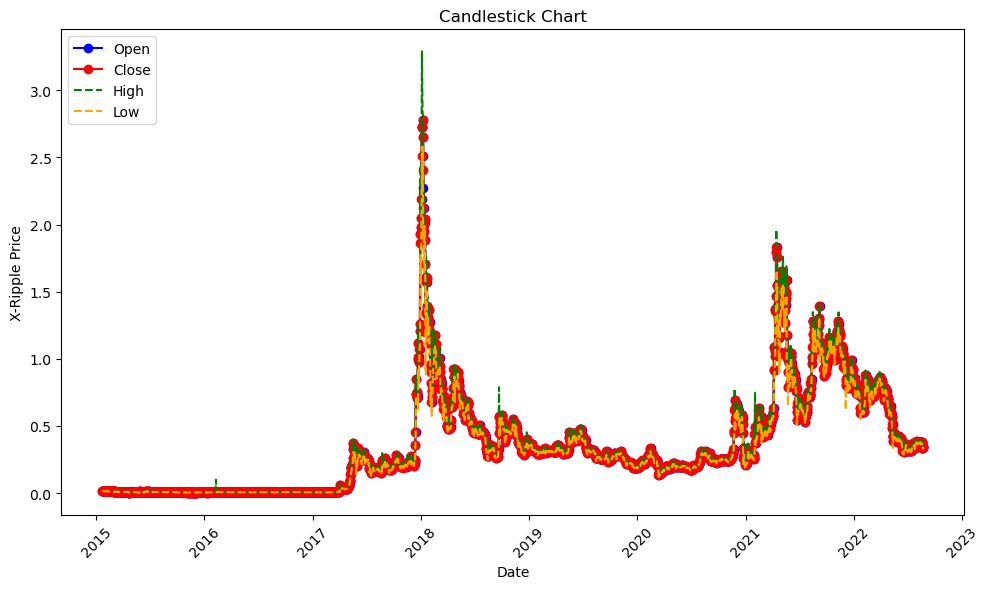

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengonversi DataFrame Spark menjadi Pandas DataFrame
pandas_df = data.toPandas()

# Mengatur kolom 'Date' sebagai index dan mengonversi ke tipe datetime
pandas_df['Date'] = pd.to_datetime(pandas_df['Date'])
pandas_df.set_index('Date', inplace=True)

# Membuat candlestick chart menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('X-Ripple Price')

# Plotting candlestick chart
plt.plot(pandas_df.index, pandas_df['Open'], color='blue', marker='o', linestyle='-')
plt.plot(pandas_df.index, pandas_df['Close'], color='red', marker='o', linestyle='-')
plt.plot(pandas_df.index, pandas_df['High'], color='green', linestyle='--')
plt.plot(pandas_df.index, pandas_df['Low'], color='orange', linestyle='--')

# Menampilkan chart
plt.legend(['Open', 'Close', 'High', 'Low'], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


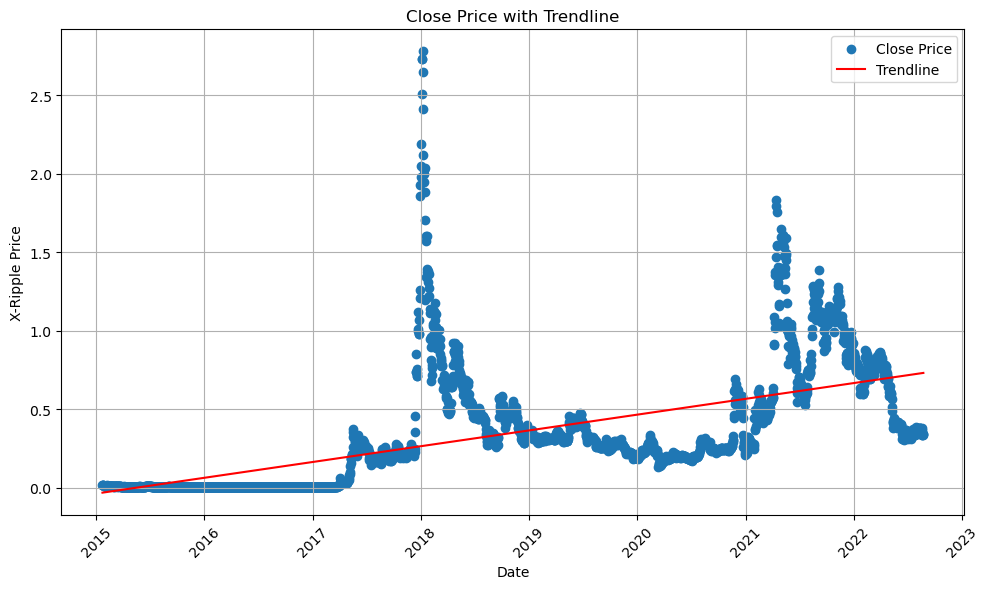

In [36]:
import matplotlib.pyplot as plt
import numpy as np 
from pyspark.sql import functions as F

# Assuming 'date' and 'close' are the respective column names in your Spark DataFrame
data = data.withColumn('date', F.to_date('date', 'yyyy-MM-dd'))

# Convert Spark DataFrame to Pandas DataFrame for visualization
data_pd = data.select('date', 'close').toPandas()

# Sort the data by date if it's not sorted already
data_pd.sort_values('date', inplace=True)

# Extracting x and y values for plotting
x = data_pd['date']
y = data_pd['close']

# Plot the stock price data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Close Price')

# Fit a trendline (linear regression) using numpy.polyfit
z = np.polyfit(x.index.values, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x.index.values), color='red', label='Trendline')

plt.title('Close Price with Trendline')
plt.xlabel('Date')
plt.ylabel('X-Ripple Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

